---

# Practical Machine Learning with Python
# Chapter 2: One Machine Learning Project

## Guillermo Avendaño-Franco  and Aldo Humberto Romero
## West Virginia University

### Machine Learning Workshop 2019

---

This notebooks is based on a variety of sources, usually other notebooks, the material was adapted to the topics covered during lessons. In some cases, the original notebooks were created for Python 2.x or older versions of Scikit-learn or Tensorflow and they have to be adapted. 

## References

### Books

 * **Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems**, 1st Edition *Aurélien Géron*  (2017)

 * **Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow**, 2nd Edition, *Sebastian Raschka* and *Vahid Mirjalili* (2017)

 * **Deep Learning: A Practitioner's approach**, *Josh Patterson* and *Adam Gibson* 
 
 * **Deep Learning**, *Ian Goodfelow*, *Yoshua Bengio* and *Aaron Courville* (2016)

### Jupyter Notebooks

 * [Yale Digital Humanities Lab](https://github.com/YaleDHLab/lab-workshops)
 
 * Aurelein Geron Hands-on Machine Learning with Scikit-learn 
   [First Edition](https://github.com/ageron/handson-ml)
   [Second Edition (In preparation)](https://github.com/ageron/handson-ml2)
   
 * [A progressive collection notebooks of the Machine Learning course by the University of Turin](https://github.com/rugantio/MachineLearningCourse)
   
 * [A curated set of jupyter notebooks about many topics](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks)
   
### Videos

 * [Caltech's "Learning from Data" by Professor Yaser Abu-Mostafa](https://work.caltech.edu/telecourse.html)
 
 
The support of the National Science Foundation and the US Department of Energy under projects: DMREF-NSF 1434897, NSF OAC-1740111 and DOE DE-SC0016176 is recognized.

<div style="clear: both; display: table;">
<div style="border: none; float: left; width: 40%; padding: 10px">
<img src="fig/NSF.jpg" alt="National Science Foundation" style="width:50%" align="left">
    </div>
    <div style="border: none; float: right; width: 40%; padding: 10px">
<img src="fig/DOE.jpg" alt="National Science Foundation" style="width:50%" align="right">
</div>

## Setup

This Jupyter notebook was created to run on a Python 3 kernel. Some Ipython magics were used: 

In [1]:
# commands prefaced by a % in Jupyter are called "magic"
# these "magic" commands allow us to do special things only related to jupyter

# %matplotlib inline - allows one to display charts from the matplotlib library in a notebook
# %load_ext autoreload - automatically reloads imported modules if they change
# %autoreload 2 - automatically reloads imported modules if they change
import matplotlib
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext watermark
%watermark

2019-08-05T11:31:30-04:00

CPython 3.7.4
IPython 7.6.1

compiler   : Clang 10.0.1 (clang-1001.0.46.4)
system     : Darwin
release    : 18.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [4]:
%watermark -iv

numpy      1.16.4
sklearn    0.21.2
matplotlib 3.1.0



# Scikit-Learn: Introduction

Scikit-learn is a collection of tools for machine learning written in Python:
[http://scikit-learn.org](http://scikit-learn.org)

## Representation of Data in Scikit-learn

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a
**two-dimensional array or matrix**.  The arrays can be
either ``numpy.ndarray``, or in some cases ``scipy.sparse`` matrices.
The size of the array is expected to be `[n_samples, n_features]`

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can have a large dimension
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.


A classification algorithm, for example, expects the data to be represented as a **feature matrix** and a **label vector**:

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right]
$$

$$
{\rm label~vector:~~~} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]
$$

Here there are $N$ samples and $D$ features.

## Example 1: Anderson's Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.

The Iris dataset is by far the earliest and the most commonly used dataset in the literature of pattern recognition. The dataset contains 150 instances of iris flowers collected in Hawaii. These instances are divided into 3 classes of Iris Setosa, Iris Versicolour and Iris Virginica:

 <table>
  <tr>
    <th><img src="fig/Iris-setosa-10_1.jpg" alt="Iris Setosa" style="width:200px"></th>
    <th><img src="fig/Iris-versicolor-21_1.jpg" alt="Iris Versicolor" style="width:200px"></th>
    <th><img src="fig/Iris-virginica-3_1.jpg" alt="Iris Virginica" style="width:200px"></th>
  </tr>
  <tr>
    <td>Iris Setosa</td>
    <td>Iris Versicolor</td>
    <td>Iris Virginica</td>
  </tr>
</table> 

Each flower is distinguished based on 4 measures of sepal's width and length, and petal's width and length. These measures are taken for each iris flower:

<img src="fig/iris.gif" alt="Iris Setosa" style="width:200px">

Detailed information of the dataset is listed next:

    4 features with numerical values, with no missing data
        sepal length in cm
        sepal width in cm
        petal length in cm
        petal width in cm 
    3 classes, including Iris Setosa, Iris Versicolour, Iris Virginica
    data size: 150 entries
    data distribution: 50 entries for each class 

There are numerous technical papers that use Iris dataset. Here is a partial list:

 * **Fisher,R.A.** *The use of multiple measurements in taxonomic problems* Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).

 * **Duda,R.O., & Hart,P.E.** *Pattern Classification and Scene Analysis* (1973) (Q327.D83) John Wiley & Sons. ISBN 0-471-22361-1. See page 218.

 * **Dasarathy, B.V.** *Nosing Around the Neighborhood: A New System Structure and Classification Rule for Recognition in Partially Exposed Environments*. (1980)  IEEE Transactions on Pattern Analysis and Machine Intelligence, Vol. PAMI-2, No. 1, 67-71.

 * **Gates, G.W.** *The Reduced Nearest Neighbor Rule*. (1972) IEEE Transactions on Information Theory, May 1972, 431-433. 

In the dataset, Iris Setosa is easier to be distinguished from the other two classes, while the other two classes are partially overlapped and harder to be separated.

More information about this problem in Pattern and Image Recognicion:
 
 * On [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)
 
 * Descripton of [Iris Dataset](http://mirlab.org/jang/books/dcpr/dataSetIris.asp?title=2-2%20Iris%20Dataset) by Roger Jang as part of a online book on [Data Clustering and Pattern Recognition](http://mirlab.org/jang/books/dcpr/)


### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

The dataset from scikit-learn is well organized into a dictionary

In [6]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
n_samples, n_features = iris.data.shape
print("Number of Samples:", n_samples)
print("Number of features:", n_features)

Number of Samples: 150
Number of features: 4


Both data and target are objects `numpy.ndarray` with the shapes below

In [11]:
print(type(iris.data))
print(iris.data.shape)
print(iris.target.shape)

<class 'numpy.ndarray'>
(150, 4)
(150,)


One example from the first 5 elements, each row is one entry:

In [12]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

The target contains 150 digits corresponding to the 3 classes of Iris flowers

In [13]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot:

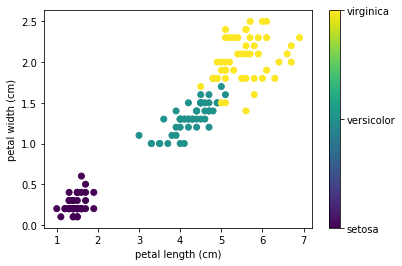

In [14]:
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

All the relations can be shown as a grid of 4x4 subplots in matplotlib

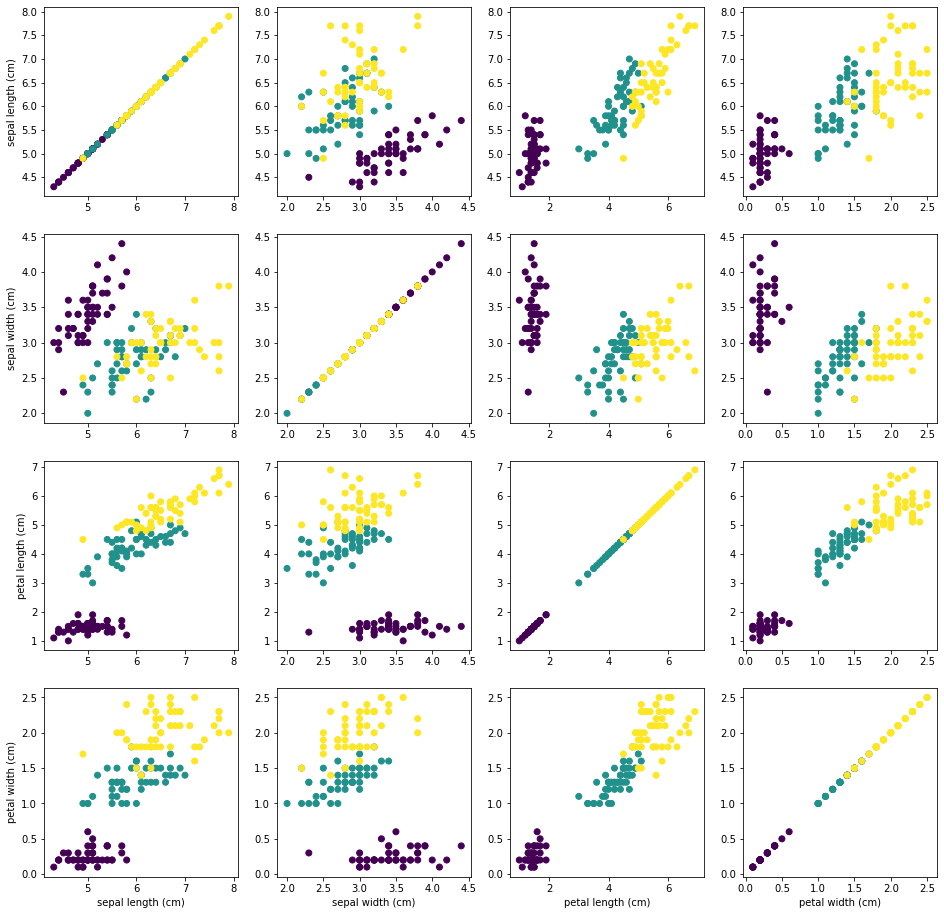

In [15]:
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
fig, axes=plt.subplots(nrows=4, ncols=4, figsize=(16,16))

for i in range(4):
    for j in range(4):
        axes[i,j].scatter(iris.data[:, j], iris.data[:, i], c=iris.target)
        if i==3: axes[i,j].set_xlabel(iris.feature_names[j])
        if j==0: axes[i,j].set_ylabel(iris.feature_names[i]);
        
#plt.colorbar(ticks=[0, 1, 2], format=formatter)

From the figure is clear that **setosa** variety is fairly separated from the **versicolor** and **virginica** and those two in turn are difficult to separate but for some features the distinction is clear. 

# Logistic Regression as Classifier

Logistic regression is a statistical method which is used to analyze datasets in which there are one or more independent variables that determine a binary outcome (True/False, 1/0). The goal of this methodology is to find the best fitting model to describe the relation between the independent input variables and the dichotomous outcome. The probability distribution would have the form of an s-shape as:

$$
\log \left( \frac{p}{1-p} \right) = a + b_1 x_1 + b_2 x_2 \cdots
$$

where p is the probability of presence of the characteristic of interest, $x_1, x_2, \cdots$ are the independent input variables and $a, b_1, b_2, \cdots$ are the model fitted parameters. As here we want to optimize the probability distribution, we do not use the square error minimization but to maximize the likelihood of observing the sample values. This statistical process can be found in many different machine learning books or in [Logistic Regression lecture](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf).



In [16]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

**Note**: To be future-proof we set `solver="lbfgs"` since this will be the default value in Scikit-Learn 0.22.

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

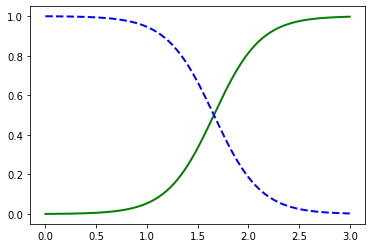

In [18]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

The figure in the book actually is actually a bit fancier:

[0, 3, -0.02, 1.02]

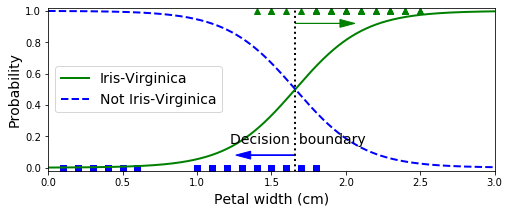

In [19]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

In [20]:
decision_boundary

array([1.66066066])

In [21]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

[2.9, 7, 0.8, 2.7]

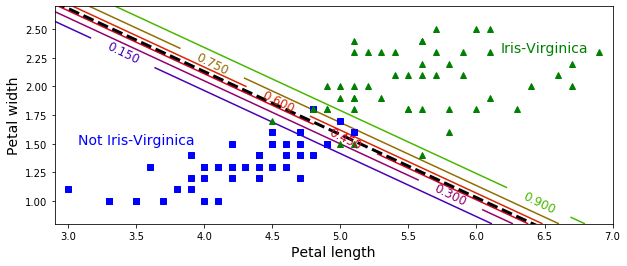

In [22]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

In [23]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[0, 7, 0, 3.5]

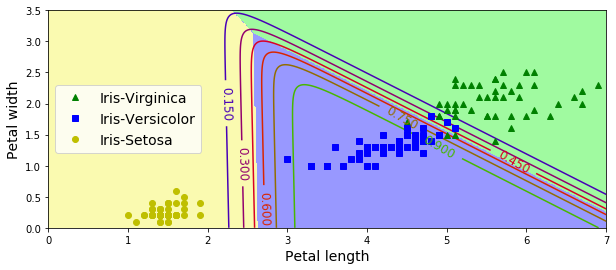

In [24]:
# logistic but 3 classes, where the largest is defined by the statistical analysis of occurrence
# of the training data
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])


In [25]:
softmax_reg.predict([[5, 2]])

array([2])

In [26]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Other Available Data

Scikit learn offers a collection of small datasets like iris for learning purposes. In adition to that, scikit also include functions to download and prepare largers datasets. Finally some datasets can be generated randomly under some models.

### Small datasets

These **small** datasets are packaged with the scikit-learn installation, and can be downloaded using the tools in ``sklearn.datasets.load_*``

In [27]:
[x for x in sklearn.datasets.__dict__.keys() if x[:5]=='load_']

['load_breast_cancer',
 'load_boston',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_images',
 'load_sample_image',
 'load_wine',
 'load_svmlight_file',
 'load_svmlight_files']

### Dataset fetcher

These larger datasets are available for download (BECAREFUL WITH THE CONNECTION!), and scikit-learn includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``

In [28]:
[x for x in sklearn.datasets.__dict__.keys() if x[:6]=='fetch_']

['fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_mldata',
 'fetch_openml',
 'fetch_olivetti_faces',
 'fetch_species_distributions',
 'fetch_california_housing',
 'fetch_rcv1']

### Modeled datasets

Finally, there are several datasets which are generated from models based on a random seed.  These are available in the ``sklearn.datasets.make_*``

In [29]:
[x for x in sklearn.datasets.__dict__.keys() if x[:5]=='make_']

['make_classification',
 'make_multilabel_classification',
 'make_hastie_10_2',
 'make_regression',
 'make_blobs',
 'make_moons',
 'make_circles',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_low_rank_matrix',
 'make_sparse_coded_signal',
 'make_sparse_uncorrelated',
 'make_spd_matrix',
 'make_swiss_roll',
 'make_s_curve',
 'make_sparse_spd_matrix',
 'make_gaussian_quantiles',
 'make_biclusters',
 'make_checkerboard']

### The Scikit-learn Estimator Object

Every algorithm is exposed in scikit-learn via an ''Estimator'' object (initialization of the model). That means that you first prepare the object with some parameters and later you apply the `fit` method (in most cases) to process the data. After that predictions can be made. Basically, the process in SciKit is always the same: import the model, initialize the model, train or fit the model and use the model to predict. 

For instance, consider a linear regression as it is implemented on the linear model of scikit-learn

In [30]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated, and have suitable default values:

In [31]:
model = LinearRegression(normalize=True)
print (model.normalize)

True


In [32]:
print (model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


**Estimated Model parameters**: When data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

For example consider as five points in the $x$ domain and the function  $y=f(x)$ will include some small randomness

In [33]:
x = np.arange(5) 
y = 0.9*np.arange(5)+ 0.5*(np.random.rand(5)-0.5)

Lets plot those points with a quick plot

(-0.5, 4.5)

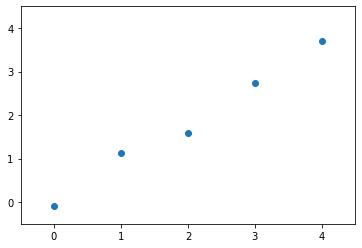

In [34]:
plt.plot(x, y, 'o')
plt.xlim(-0.5, 4.5)
plt.ylim(-0.5, 4.5)

scikit-learn need the input data as 2D array instead of a unidimensional array. The solution is to add a new axis to the original x array using `numpy.newaxis`

In [35]:
# The input data for sklearn is 2D: (samples == 3 x features == 1)
X = x[:, np.newaxis]
print (X)
print (y)

[[0]
 [1]
 [2]
 [3]
 [4]]
[-0.10035373  1.12632872  1.5928998   2.73337815  3.6936705 ]


In [36]:
model.fit(X, y) 
print (model.coef_)
print (model.intercept_)

[0.91950979]
-0.029834886118447868


The model found a line with a slope $\approx 0.84$ and intercept $\approx 0.18$, slightly different from the slopw $0.9$ and itercept $0.0$ if random numbers will not created deviations in the data.

# Taxonomy of Machine Learning Algorithms

There are several ways of classify the wide field of Machine Learning. Algorithms can be classified by the dimensionality of the input and output, if they deal with discrete (categorical) input or output and the basic algorithm underlying the solution. However a classical classification is based on existence or absents of known output in the problem proposed.

## Supervised,  Unsupervised and Reinforcement learning

The algorithms of machine learning are generally split into two basic categories: **Supervised**, **Unsupervised** and reinforcement learning.

### Supervised Learning
**Supervised** learning concerns **labeled** data, and the construction of models that can be used to predict labels for new, unlabeled data.

You can think about these problems as having a set of two sets: 

\begin{equation}
\left[\; \mathbf{input\ data} \; + \; \mathbf{correct\ result} \; \right] \rightarrow \mathbf{predict\ results\ for\ new\ data}
\end{equation}

*Example:* Given a set of *labeled* hand-written digits, create an algorithm which will predict the label of a new instance for which a label is not known.

### Unsupervised Learning
**Unsupervised** learning concerns **unlabeled** data, and finding structure in the data such as clusters, important dimensions, etc.

\begin{equation}
\left[\; \mathbf{input\ data} \; + \; ? \; \right] \rightarrow \mathbf{discover\ structure\ present\ in\ the\ data}
\end{equation}


*Example:* Given a set of *unlabeled* digits, determine which digits are related.

### Reinforcement Learning
**Reinforcement** learning concerns data with poor knowledge on what the correct results looks like, but we are able to provide a function that grades how good a particular solution should be.

\begin{equation}
\left[\; \mathbf{input\ data} \; + \; \mathit{some\ output} \; + \mathbf{grade\ function} \;\right] \rightarrow \mathbf{the\ better\ strategy\ to\ achieve\ a\ solution}
\end{equation}


*Example:* The algorithms used in autonomous vehicles or in learning to play a game against a human opponent. 

### Supervised Learning: Classification and Regression

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features. A relatively simple example is predicting the species of 
iris given a set of measurements of its flower. This is a relatively simple task. 
Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from other
observed quantities.

Supervised learning is further broken down into two categories, **classification** and **regression**.
In classification, the label is discrete, while in regression, the label is continuous.

#### Classification with K nearest neighbors
K nearest neighbors (kNN) is one of the simplest non parametric learning strategies that can be used for classification and regression.
kNN is one of the simpler algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions which are based on a metric definition, where the Euclidean, Manhattan or Minkowski are the most used ones). An important detail to keep in mine is that it is desirable that all features should be measured on the same scale. In case the scale is not the same, it is advisable that the scale is standarized.

The algorithm can be summarized as follows: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [37]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print (iris.target_names[result])

['virginica']


Using this kNN we can create a map of all the different outcomes fixing the values of 3cm x 5cm sepal. Here we will use the linspace function from numpy that return an evenly spaced numbers over a specified interval.

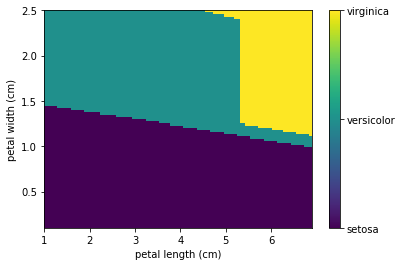

In [38]:
N=100
preds = np.zeros((N,N))
x0 = 3
x1 = 5
minx2=np.min(iris.data[:,2])
maxx2=np.max(iris.data[:,2])
x2 = np.linspace(minx2, maxx2, N, endpoint=True)
minx3=np.min(iris.data[:,3])
maxx3=np.max(iris.data[:,3])
x3 = np.linspace(minx3, maxx3, N, endpoint=True)

for i in range(N):
    for j in range(N):
        preds[i,j]=knn.predict([[x0, x1 , x2[i], x3[j]],])

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
        
plt.imshow(preds[::-1], extent=[minx2,maxx2, minx3, maxx3],aspect='auto')
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);

#### Classification with Support Vector Classification

The goal of the support vector machine (SVM) algorithm is to find a hyperplane in an N-dimensional space(where N is the number of features) that distinctly classifies the data points.
This algorithm receive a given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side of the plane.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

In [39]:
from sklearn.svm import SVC

In [40]:
model = SVC(gamma='scale')
model.fit(X, y)
result = model.predict([[3, 5, 4, 2],])
print (iris.target_names[result])

['versicolor']


In [66]:
a=(5,)
a

(5,)

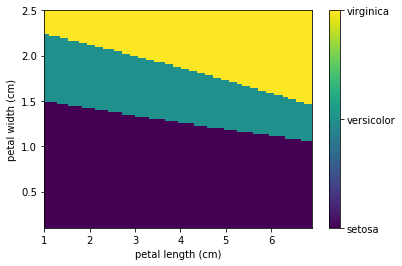

In [41]:
N=100
preds = np.zeros((N,N))
x0 = 3
x1 = 5
minx2=np.min(iris.data[:,2])
maxx2=np.max(iris.data[:,2])
x2 = np.linspace(minx2, maxx2, N, endpoint=True)
minx3=np.min(iris.data[:,3])
maxx3=np.max(iris.data[:,3])
x3 = np.linspace(minx3, maxx3, N, endpoint=True)

for i in range(N):
    for j in range(N):
        preds[i,j]=model.predict([[x0, x1 , x2[i], x3[j]],])

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
        
plt.imshow(preds[::-1], extent=[minx2,maxx2,minx3,maxx3],aspect='auto')
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3]);

#### Regression Example

Simplest possible regression is fitting a line to data:

Model coefficient: 3.93491, and intercept: 1.46229


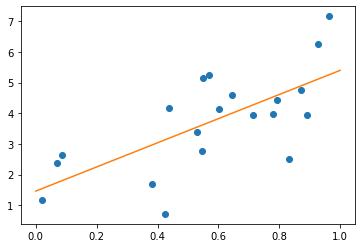

In [42]:
# Create some simple data
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X.squeeze() + 2 + np.random.normal(size=20)

# Fit a linear regression to it
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print ("Model coefficient: %.5f, and intercept: %.5f"
       % (model.coef_, model.intercept_))

# Plot the data and the model prediction
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = model.predict(X_test)

plt.plot(X.squeeze(), y, 'o')
plt.plot(X_test.squeeze(), y_test);

### Unsupervised Learning: Dimensionality Reduction and Clustering

**Unsupervised Learning** addresses a different sort of problem. Here the data has no labels,
and we are interested in finding pattern or structure between the objects in question. In a sense,
you can think of unsupervised learning as a means of discovering labels from the data itself.
Unsupervised learning comprises tasks such as *dimensionality reduction*, *clustering*, and
*density estimation*. For example, in the iris data discussed above, we can used unsupervised
methods to determine combinations of the measurements which best display the structure of the
data. As we'll see below, such a projection of the data can be used to visualize the
four-dimensional dataset in two dimensions. Some more involved unsupervised learning problems are:

- given detailed observations of distant galaxies, determine which features or combinations of
  features best summarize the information.
- given a mixture of two sound sources (for example, a person talking over some music),
  separate the two (this is called the [blind source separation](http://en.wikipedia.org/wiki/Blind_signal_separation) problem).
- given a video, isolate a moving object and categorize in relation to other moving objects which have been seen.
- A given crystal structure, we can use to predict the stability.

Sometimes the two may even be combined: e.g. Unsupervised learning can be used to find useful
features in heterogeneous data, and then these features can be used within a supervised
framework.

#### Dimensionality Reduction: PCA

Principle Component Analysis (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance. This method is one of the most popular linear dimension reduction methodologies available in machine learning. Sometimes, it is used alone and sometimes as a starting solution for other dimension reduction methods. PCA is a projection based method which transforms the data by projecting it onto a set of orthogonal axes.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it:

Reduced dataset shape: (150, 2)
Meaning of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


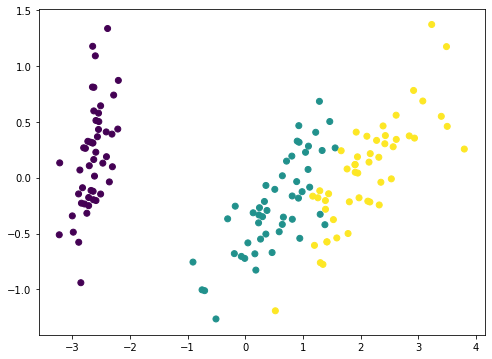

In [43]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print ("Reduced dataset shape:", X_reduced.shape)

fig,ax=plt.subplots(figsize=(8,6))

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

print ("Meaning of the 2 components:")
for component in pca.components_:
    print (" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

#### Clustering: K-means

K-means clustering is one of the simplest and most popular unsupervised machine learning algorithms by practicioners.
As discussed before, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.
AndreyBu, who has more than 5 years of machine learning experience and currently teaches people his skills, says that “the objective of K-means is simple: group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.”

The main idea with this algorithm is to group similar data into clusters and try to find the underlying developed pattern by looking how the data clusters into a fixed number of (k) clusters in the dataset.

Note that these clusters will uncover relevent hidden structure of the data only if the criterion used highlights it.

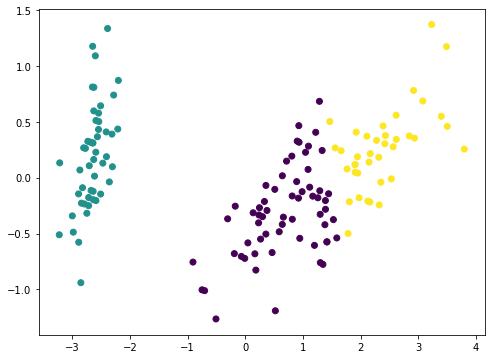

In [44]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

fig,ax=plt.subplots(figsize=(8,6))

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred);

### Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

# Machine Learning with Scikit-Learn: Validation and Model Selection

This section focuses on **validation** and **model selection**.

## Supervised Learning Example: Classifying Digits

Features can be any **uniformly measured** numerical observation of the data. For example, in the digits data, the features are the brightness of each pixel:

In [45]:
digits = sklearn.datasets.load_digits()
digits.data.shape

(1797, 64)

print(digits.DESCR)

In [46]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Using the Gaussian Naive Bayes Estimator

Let's show a quick classification example, using the simple-and-fast Gaussian Naive Bayes estimator. Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Basically, Bayes’ Theorem provides a mathematical procedure where we can calculate the probability of a hypothesis given our prior knowledge. This can be described by this equation

$$
P[h|d] = \frac{P[d|h] P[h]}{P[d]}
$$
where $P$ is a probability distribution function, $d$ is the historic data and $h$ is the tested hypothesis. Therefore, this equation can be read as follows: the conditional probability (posterior) of a given hypothesis occurs provided  the data $d$ can be obtained as the fraction between the product of the probability that the data $d$ occurs given that $h$ is true with the probability of the hypothesis divided by the probability of the data.

Now, the posterior probability can be obtained from a number of different hypotheses. Based on this, the maximum probable hypothesis (MAP: maximum probably hypothesis) can be calculated and  
After calculating the posterior probability for a number of different hypotheses, you can select the hypothesis with the highest probability. This is the maximum probable hypothesis and may formally be called the maximum a posteriori (MAP) hypothesis. How we account on the different probability terms give rise to different methods.

In the so called naive Bayes, the probabilities for each hypothesis are simplified, such that the calculation becomes easier. This approximation will say that the data realization to obtain $P[d|h]$ is independent, which means that
$P[d|h] =  P[d_1|h] P[d_2|h] P[d_3|h] \cdots$.

Now, the method reduces to the following. By entering a set of classified data (training), we can use it to obtain the probabilities of each class and the conditional probabilities of each input value given each class. This last probability is obtained directly from the training data as the frequency of each feature in a given class divided by the frequency of instaces of that the class value. 

A very simple case is observed as follows:


In [47]:
from sklearn.naive_bayes import GaussianNB
X = digits.data
y = digits.target

# Instantiate the estimator
clf = GaussianNB()

# Fit the estimator to the data, leaving out the last five samples
clf.fit(X[:-5], y[:-5])

# Use the model to predict the last several labels
y_pred = clf.predict(X[-5:])

print (y_pred)
print (y[-5:])

[9 0 8 9 8]
[9 0 8 9 8]


We see that this relatively simple model leads to a perfect classification of the last few digits!

Let's use the model to predict labes for the full dataset, and plot the **confusion matrix**, which is a convenient visual representation of how well the classifier performs.

By definition a confusion matrix $C$ is such that $C_{i, j}$ is equal to the number of observations known to be in $i$ but predicted to be in group $j$

classification accuracy: 0.8580968280467446


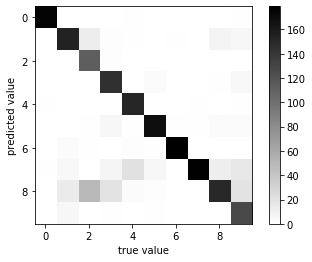

In [48]:
from sklearn import metrics

clf = GaussianNB()
clf.fit(X, y)
y_pred = clf.predict(X)

def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred),
               cmap=plt.cm.binary, interpolation='none')
    plt.colorbar()
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    
print ("classification accuracy:", metrics.accuracy_score(y, y_pred))
plot_confusion_matrix(y, y_pred)

Interestingly, there is confusion between some values.  In particular, the number **2** is often mistaken for the number **8** by this model!  But for the vast majority of digits, we can see that the classification looks correct.

Let's use the ``metrics`` submodule again to print the accuracy of the classification:

In [49]:
print (metrics.accuracy_score(y, y_pred))

0.8580968280467446


We have an 82% accuracy rate with this particular model.

But there's a problem: we are testing the model on the data we used to train the model. As we'll see later, this is generally not a good approach to model validation!  Because of the nature of the Naive Bayes estimator, it's alright in this case, but we'll see later examples where this approach causes problems.

# Measuring Prediction Performance

An important piece of the learning task is the measurement of prediction performance, also known as **model validation**.  We'll go into detail about this, but first motivate the approach with an example.

## The Importance of Splitting
Above we looked at a *confusion matrix*, which can be computed based on the results of any model. Let's look at another classification scheme here, the *K-Neighbors Classifier*

classification accuracy: 1.0


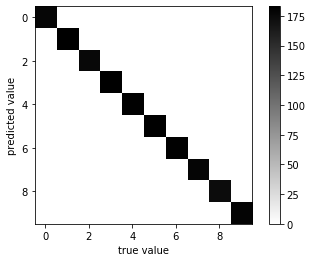

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

digits = datasets.load_digits()
X, y = digits.data, digits.target

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)

print ("classification accuracy:", metrics.accuracy_score(y, y_pred))
plot_confusion_matrix(y, y_pred)

Our classifier gives perfect results!  Have we settled on a perfect classification scheme?

**No!**  The *K*-neighbors classifier is an example of an instance-based classifier, which memorizes the input data and compares any unknown sample to it.  To accurately measure the performance, we need to use a separate *validation set*, which the model has not yet seen.

Scikit-learn contains utilities to split data into a training and validation set:

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, X_test.shape)

(1257, 64) (540, 64)


classification accuracy: 0.9833333333333333


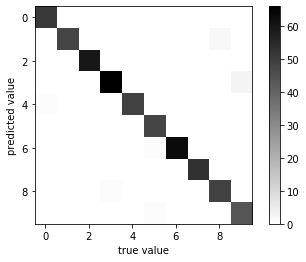

In [52]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("classification accuracy:", metrics.accuracy_score(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred)

This gives us a more accurate indication of how well the model is performing.

For this reason you should **always do a train/test split** when validating a model.

## Exploring Validation Metrics

Above, we used perhaps the most simple evaluation metric, the number of matches and mis-matches.  But this is not always sufficient.  For example, imagine you have a situation where you'd like to identify a rare class of event from within a large number of background sources.

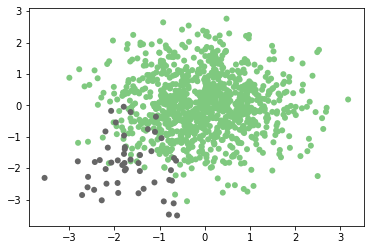

In [53]:
# Generate an un-balanced 2D dataset
np.random.seed(0)
X = np.vstack([np.random.normal(0, 1, (950, 2)),
               np.random.normal(-1.8, 0.8, (50, 2))])
y = np.hstack([np.zeros(950), np.ones(50)])

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='none',
            cmap=plt.cm.Accent);

### Exploring other Validation Scores

Until now we are using only the **accuracy** to evaluate our algorithms. We can calculate other scores such as the **precision**, the **recall**, and the **f1 score**:

In [54]:
from sklearn import metrics
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(kernel='linear').fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("accuracy:", metrics.accuracy_score(y_test, y_pred))
print ("precision:", metrics.precision_score(y_test, y_pred))
print ("recall:", metrics.recall_score(y_test, y_pred))
print ("f1 score:", metrics.f1_score(y_test, y_pred))

accuracy: 0.972
precision: 0.8
recall: 0.75
f1 score: 0.7741935483870969


#### What do these mean?

These are ways of taking into account not just the classification results, but the results **relative to the true category**.

 $$ {\rm accuracy} \equiv \frac{\rm correct~labels}{\rm total~samples} $$

---

 $$ {\rm precision} \equiv \frac{\rm true~positives}{\rm true~positives + false~positives} $$

---

 $$ {\rm recall} \equiv \frac{\rm true~positives}{\rm true~positives + false~negatives} $$

---

 $$ F_1 \equiv 2 \frac{\rm precision \cdot recall}{\rm precision + recall} $$

The **accuracy**, **precision**, **recall**, and **f1-score** all range from 0 to 1, with 1 being optimal.
Here we've used the following definitions:

- *True Positives* are those which are labeled ``1`` which are actually ``1``
- *False Positives* are those which are labeled ``1`` which are actually ``0``
- *True Negatives* are those which are labeled ``0`` which are actually ``0``
- *False Negatives* are those which are labeled ``0`` which are actually ``1``


We can quickly compute a summary of these statistics using scikit-learn's provided convenience function:

In [55]:
print (metrics.classification_report(y_test, y_pred,
                                    target_names=['background', 'foreground']))

              precision    recall  f1-score   support

  background       0.98      0.99      0.99       234
  foreground       0.80      0.75      0.77        16

    accuracy                           0.97       250
   macro avg       0.89      0.87      0.88       250
weighted avg       0.97      0.97      0.97       250



This tells us that, though the overall correct classification rate is 97%, we only correctly identify 67% of the desired samples, and those that we label as positives are only 83% correct!  This is why you should make sure to carefully choose your metric when validating a model.

## Cross-Validation

Using the simple train/test split as above can be useful, but there is a disadvantage: **You're ignoring a portion of your dataset**.  One way to address this is to use cross-validation.

The simplest cross-validation scheme involves running two trials, where you split the data into two parts, first training on one, then training on the other:

In [56]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.5)
print (X1.shape)
print (X2.shape)

(500, 2)
(500, 2)


In [57]:
y2_pred = SVC(kernel='linear').fit(X1, y1).predict(X2)
y1_pred = SVC(kernel='linear').fit(X2, y2).predict(X1)

print (np.mean([metrics.precision_score(y1, y1_pred),
               metrics.precision_score(y2, y2_pred)]))

0.7467320261437909


This is known as **two-fold** cross-validation, and is a special case of *K*-fold cross validation.

Because it's such a common routine, scikit-learn has a K-fold cross-validation scheme built-in:

In [58]:
from sklearn.model_selection import cross_val_score

# Let's do a 2-fold cross-validation of the SVC estimator
print (cross_val_score(SVC(kernel='linear'), X, y, cv=2, scoring='precision'))

[0.75       0.84210526]


It's also possible to use ``sklearn.cross_validation.KFold`` and ``sklearn.cross_validation.StratifiedKFold`` directly, as well as other cross-validation models which you can find in the ``cross_validation`` module.

Example: The ``SVC`` classifier takes a parameter ``C`` whose default value is ``1``.  Using 5-fold cross-validation, make a plot of the precision as a function of ``C``, for the ``SVC`` estimator on this dataset.  For best results, use a logarithmic spacing of ``C`` between 0.1 and 100.

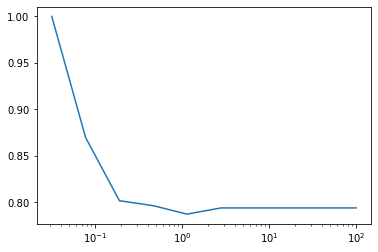

In [59]:
Cs = np.logspace(-1.5, 2, 10)
scores = []

for C in Cs:
    score = cross_val_score(SVC(kernel='linear', C=C), X, y, cv=5, scoring='precision')
    scores.append(score.mean())

plt.semilogx(Cs, scores)

## Grid Search

The previous exercise is an example of a **grid search** for model evaluation.  Again, because this is such a common task, Scikit-learn has a grid search tool built-in, which is used as follows.  Note that ``GridSearchCV`` has a ``fit`` method: it is a meta-estimator: an estimator over estimators!

In [60]:
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel='linear')
Crange = np.logspace(-1.5, 2, 10)

grid = GridSearchCV(clf, param_grid={'C': Crange},
                    scoring='precision', cv=5)
grid.fit(X, y)

print ("best parameter choice:", grid.best_params_)

best parameter choice: {'C': 0.03162277660168379}


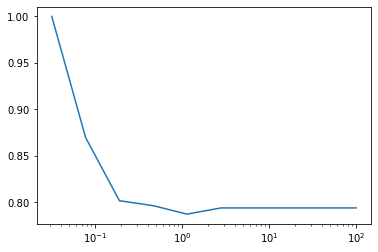

In [61]:
scores = [g for g in grid.cv_results_['mean_test_score']]
plt.semilogx(Crange, scores);

Grid search can come in very handy when you're tuning a model for a particular task.